# SVM Evaluation in Hypergrid Harness


In [1]:
import init
from common import constants as cn
from common_python.classifier.hypergrid_harness_meta_classifier import HypergridHarnessMetaClassifier
from common_python.plots.plotter import Plotter
from common_python.classifier.random_hypergrid_harness import RandomHypergridHarness

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.distributions.empirical_distribution as stats

%matplotlib inline

## Hypergrid Harness

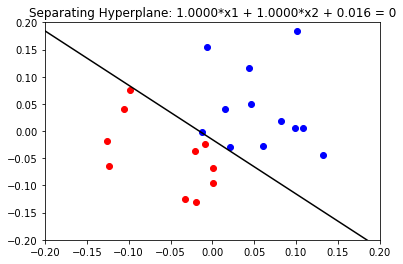

In [2]:
harness = RandomHypergridHarness(impurity=0, num_point=25, stds=[0.1, 0.1])
harness.plotGrid(xlim=[-.2, .2], ylim=[-.2, .2])

In [3]:
harness.trinary.impurity

0.04

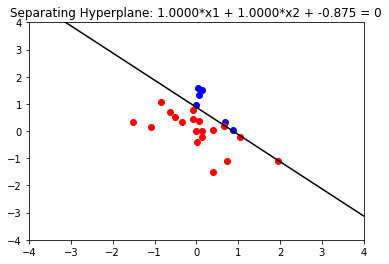

In [4]:
rng = [-4, 4]
harness = RandomHypergridHarness(impurity=-0.52, num_point=25, stds=[1, 1])
harness.plotGrid(xlim=rng, ylim=rng)

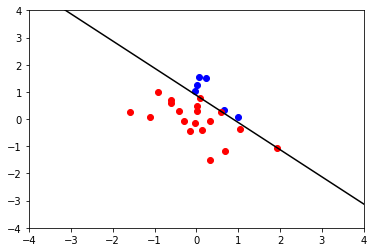

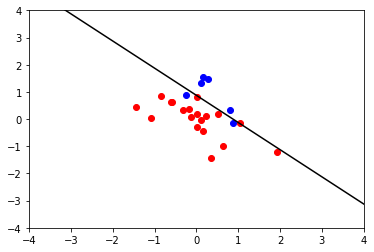

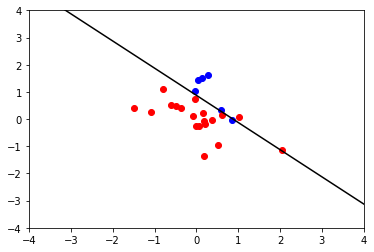

In [5]:
for _ in range(3):
    [trinary] = harness.trinary.perturb(0.1)
    harness.plotGrid(xlim=rng, ylim=rng, trinary=trinary, title="")

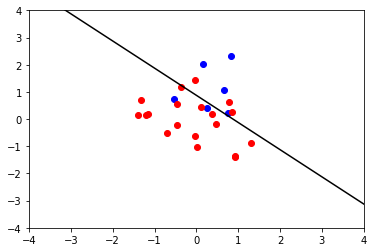

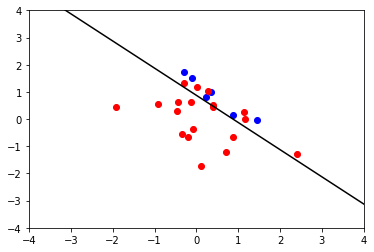

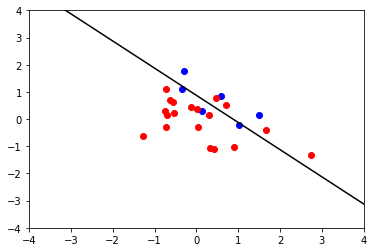

In [6]:
for _ in range(3):
    [trinary] = harness.trinary.perturb(0.5)
    harness.plotGrid(xlim=rng, ylim=rng, trinary=trinary, title="")

## Evaluations

In [12]:
data_pth = "replication_policies_analysis.csv"
harness = HypergridHarnessMetaClassifier(data_pth=data_pth)
impuritys = harness.df_data["impurity"].unique()
impuritys.sort()



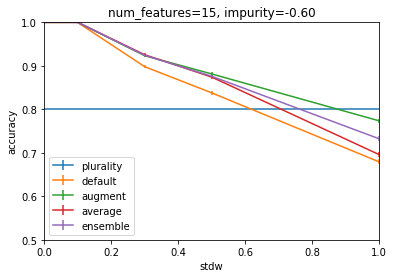

In [20]:
num_feature = 15
stdb = 0.6
impurity = -0.6
harness.plotMetaClassifiers(num_feature, stdb, impurity,
                            title="num_features=%d, impurity=%2.2f" % (num_feature, impurity), xlim=[0, 1])

In [15]:
def plotAccuracy(clf):
    for num_feature in [5, 15]:
        for stdb in [0.2, 0.6]:
            print("%s: no. features: %d, stdb: %2.2f" % (clf, num_feature, stdb))
            harness.plotMultipleMetaClassifiers(num_feature, stdb, impuritys, clf=clf, figsize=(12,10))


SVM: no. features: 5, stdb: 0.20


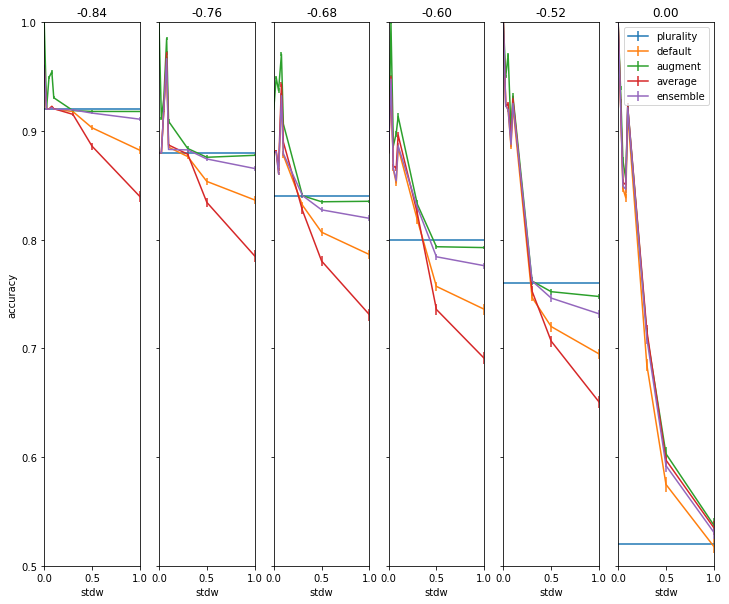

SVM: no. features: 5, stdb: 0.60


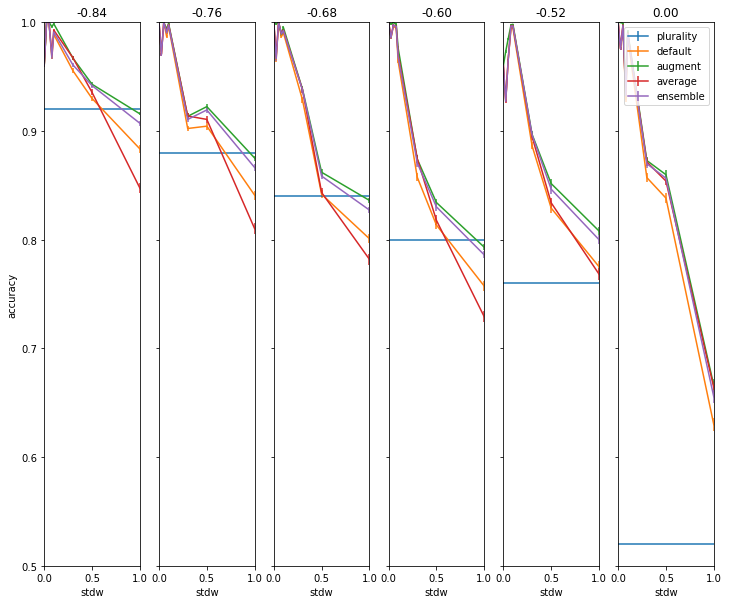

SVM: no. features: 15, stdb: 0.20


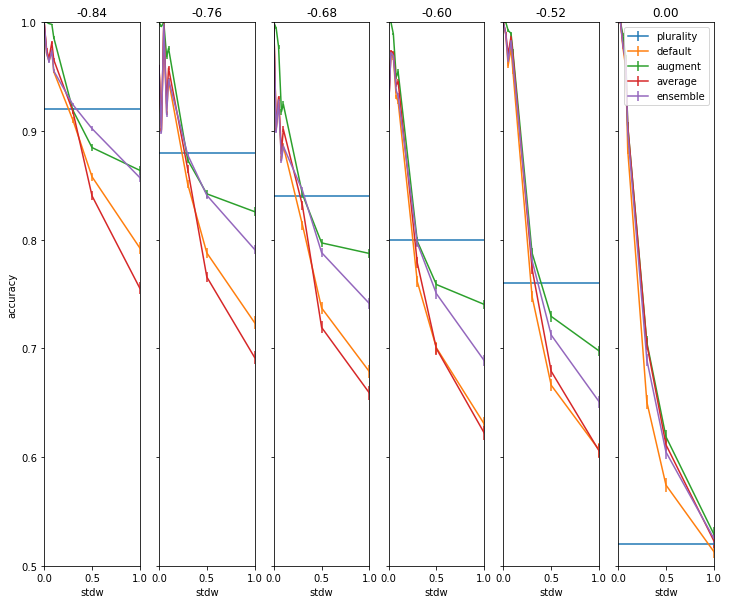

SVM: no. features: 15, stdb: 0.60


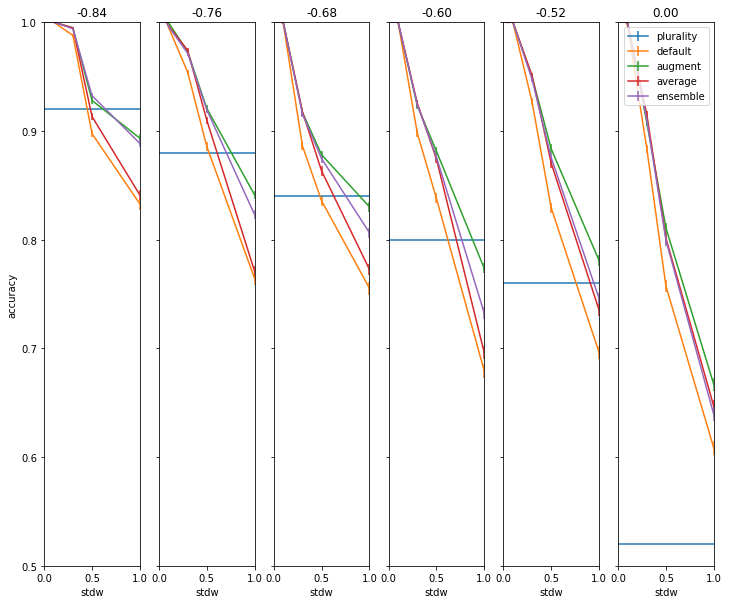

In [16]:
plotAccuracy("SVM")

logistic: no. features: 5, stdb: 0.20


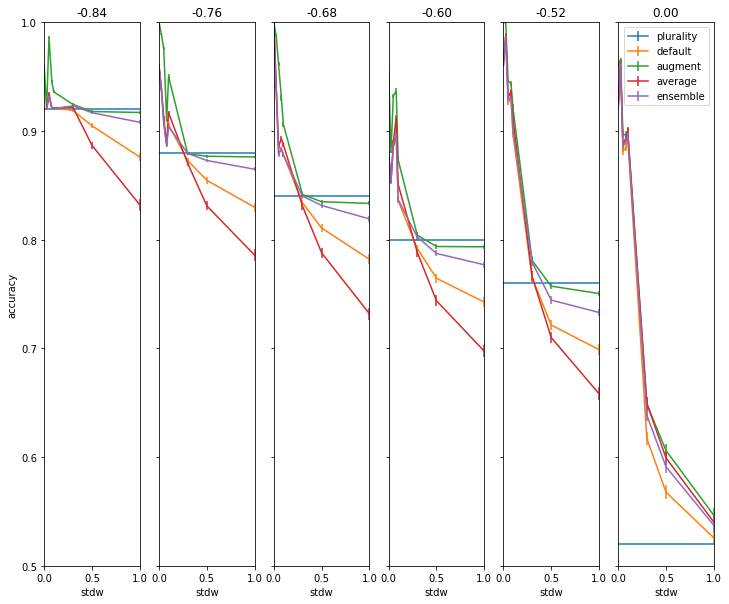

logistic: no. features: 5, stdb: 0.60


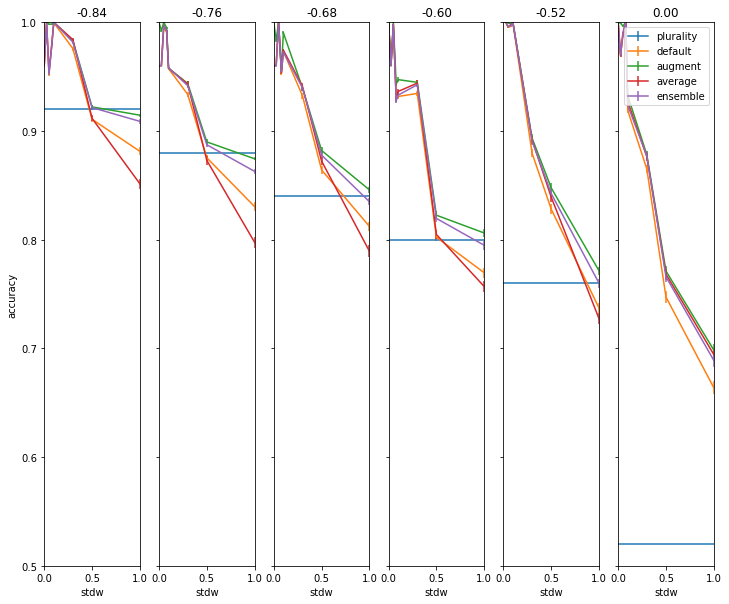

logistic: no. features: 15, stdb: 0.20


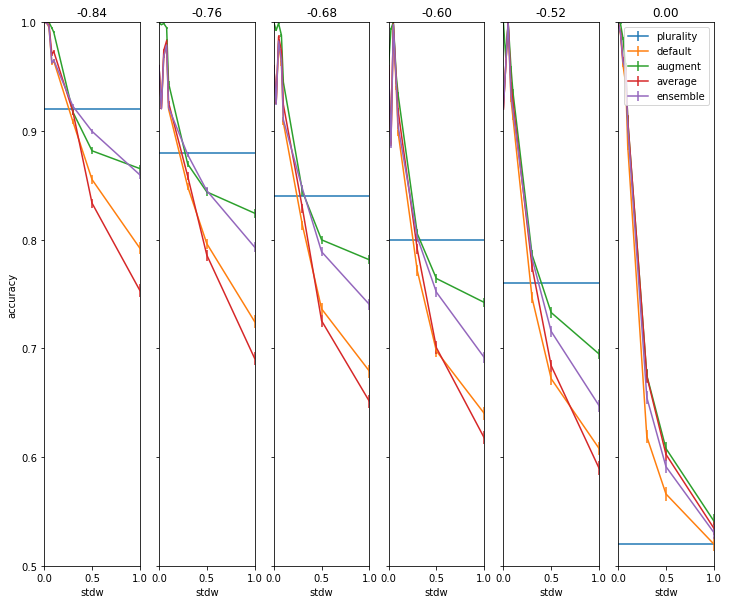

logistic: no. features: 15, stdb: 0.60


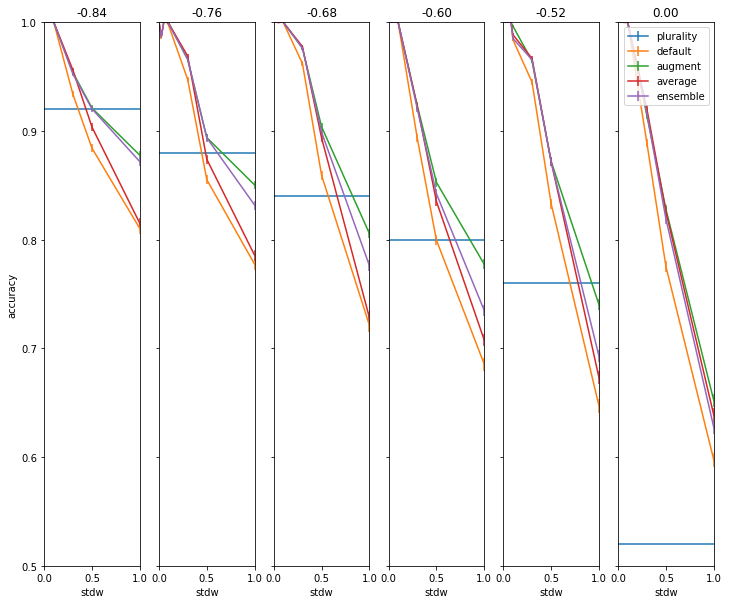

In [17]:
plotAccuracy("logistic")